In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("seaborn-dark-palette")
from datetime import datetime

**First Dataset_Animalpolitico.com**


In [320]:
df = pd.read_excel('actas-defuncion-covid-19-cdmx.xlsx')
df.sample(3)

,EDAD,FECHA,SEMANA,MES,RAZON,ACTA
1697,45 AÑOS,2020-04-29,18,4,"SINDROME DE DIFICULTAD RESPIRATORIA AGUDA, NEU...",1157
2203,48 AÑOS,2020-05-01,18,5,"INSUFICIENCIA RESPIRATORIA AGUDA, PROBABLE SAR...",11821
1453,68 AÑOS,2020-04-27,18,4,"SINDROME DE DISTRES RESPIRATORIO AGUDO, NEUMON...",1066


In [321]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4579 entries, 0 to 4578
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   EDAD    4579 non-null   object        
 1   FECHA   4579 non-null   datetime64[ns]
 2   SEMANA  4579 non-null   int64         
 3   MES     4579 non-null   int64         
 4   RAZON   4579 non-null   object        
 5   ACTA    4579 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 214.8+ KB


In [0]:
df = df.drop(columns=['SEMANA','MES','ACTA'])

In [323]:
df['EDAD'] = df['EDAD'].str.rstrip('DIASAÑOSMESES')
df.head()

,EDAD,FECHA,RAZON
0,41,2020-03-18,"CHOQUE SEPTICO, NEUMONIA POR COVID 19 POR SARS..."
1,61,2020-03-23,"INSUFICIENCIA RESPIRATORIA AGUDA, NEUMONIA VIR..."
2,60,2020-03-26,"SINDROME DE INSUFICIENCIA RESPIRATORIA AGUDA, ..."
3,37,2020-03-26,NEUMONIA POR CORONAVIRUS
4,63,2020-03-26,"CERVICOVAGINITIS PURULENTA, CARCINOMA EPIDERMO..."


In [0]:
df['EDAD'] = df['EDAD'].astype(int)

In [0]:
df = df.set_index('FECHA')

In [326]:
df.head(5)

,EDAD,RAZON
FECHA,,
2020-03-18,41,"CHOQUE SEPTICO, NEUMONIA POR COVID 19 POR SARS..."
2020-03-23,61,"INSUFICIENCIA RESPIRATORIA AGUDA, NEUMONIA VIR..."
2020-03-26,60,"SINDROME DE INSUFICIENCIA RESPIRATORIA AGUDA, ..."
2020-03-26,37,NEUMONIA POR CORONAVIRUS
2020-03-26,63,"CERVICOVAGINITIS PURULENTA, CARCINOMA EPIDERMO..."


In [327]:
 df = df[df.RAZON.str.contains('COVID')]
 df.RAZON.to_list()

['CHOQUE SEPTICO, NEUMONIA POR COVID 19 POR SARS .COV-2, DIABETES MELLITUS TIPO 2, OBESIDAD.',
 'INSUFICIENCIA RESPIRATORIA AGUDA, NEUMONIA VIRAL COVID - 19, MIELOMA MULTIPLE, DIABETES MELLITUS TIPO 2.',
 'SINDROME DE INSUFICIENCIA RESPIRATORIA AGUDA, NEUMONIA DEBIDA A OTROS VIRUS, COVID - 19, HIPÉRTENSION ARTERIAL SISTEMICA.',
 'NEUMONIA GRAVE COVID - 19, ENFERMEDAD PULMONAR OBSTRUCTIVA CRONICA.',
 'NEUMONIA GRAVE, COVID 19 CONFIRMADO.',
 'NEUMONIA GRAVE POR COVID - 19, DIABETES MELLITUS TIPO 2.',
 'NEUMONIA GRAVE,INFECCION POR COVID-19',
 'NEUMONIA GRAVE, INFECCION POR COVID-19',
 'NEUMONIA GRAVE, INFECCION POR COVID -19',
 'ENFERMEDAD RESPIRATORIA AGUDA COVID.19',
 'INSUFICIENCIA RESPIRATORIA, SINDROME DE INSUFICIENCIA RESPIRATORIA AGUDA, NEUMONIA POR COVID-19, DIABETES MELLITUS',
 'CHOQUE SEPTICO DE ORIGEN PULMONAR, NEUMONIA ATIPICA POR COVID-19 DIABETES MELLITUS',
 'NEUMONIA POR COVID -19, DIABETES MELLITUS RECIENTE DIAGNOSTICO',
 'INSUFICIENCIA RESPIRATORIA, NEUMONIA ATIPICA, PRO

In [0]:
#targets = ['PROBABLE','SOSPECHA','SOSPECHOSO','POSIBLE','PROB','PB','NO IDENTIFICADO','DESCARTADO','SOSPECHO','SOPECHOSO','PRBABLE',
          # 'PROPOBABLE','POBALE','SOPECOSO','PROPABLE','PROVABLE','PRIOBABLE']
#df[df.RAZON.apply(lambda sentence: any(word in sentence for word in targets))]

In [0]:
df = df[~df.RAZON.str.contains("PROBABLE")]
df = df[~df.RAZON.str.contains("SOSPECHA")]
df = df[~df.RAZON.str.contains("SOSPECHOSO")]
df = df[~df.RAZON.str.contains("POSIBLE")]
df = df[~df.RAZON.str.contains("PROB")]
df = df[~df.RAZON.str.contains("PB")]
df = df[~df.RAZON.str.contains("NO IDENTIFICADO")]
df = df[~df.RAZON.str.contains("DESCARTADO")]
df = df[~df.RAZON.str.contains("SOSPECHO")]
df = df[~df.RAZON.str.contains("SOPECHOSO")]
df = df[~df.RAZON.str.contains("PRBABLE")]
df = df[~df.RAZON.str.contains("PROPOBABLE")]
df = df[~df.RAZON.str.contains("POBALE")]
df = df[~df.RAZON.str.contains("SOPECOSO")]
df = df[~df.RAZON.str.contains("PROPABLE")]
df = df[~df.RAZON.str.contains("PROVABLE")]
df = df[~df.RAZON.str.contains("PRIOBABLE")]


In [330]:
df

,EDAD,RAZON
FECHA,,
2020-03-18,41,"CHOQUE SEPTICO, NEUMONIA POR COVID 19 POR SARS..."
2020-03-23,61,"INSUFICIENCIA RESPIRATORIA AGUDA, NEUMONIA VIR..."
2020-03-26,60,"SINDROME DE INSUFICIENCIA RESPIRATORIA AGUDA, ..."
2020-03-27,69,"NEUMONIA GRAVE COVID - 19, ENFERMEDAD PULMONAR..."
2020-03-27,62,"NEUMONIA GRAVE, COVID 19 CONFIRMADO."
...,...,...
2020-05-11,53,"INSUFICIENCIA RESPIRATORIA AGUDA, NEUMONIA VIR..."
2020-05-12,40,NEUMONIA POR SARS2 COVID 19
2020-05-12,61,"INSUFICIENCIA RESPIRATORIA AGUDA, NEUMONIA ATI..."


---

**Second Data_Datosabertos_Gob.mx**

In [331]:
df2 = pd.read_csv('200521COVID19MEXICO.csv', encoding='latin1')  #instead encoding = 'uft-8'
df2.head()
#Sexo: 1_Mujer, 2_HOmbre
#Resultado: 1_positivo
#Entidad: 09_cdmx

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-05-21,11e989,2,3,27,2,27,27,4,2,2020-04-24,2020-04-20,2020-04-27,2,1,71,1,97,99,1,2,2,2,1,2.0,2.0,2.0,2.0,2.0,1.0,1.0,99.0,MÃ©xico,99,2.0
1,2020-05-21,1aad65,2,4,19,2,5,5,18,2,2020-03-30,2020-03-30,2020-04-03,2,2,66,1,97,2,2,2,2,2,2,1.0,2.0,2.0,2.0,2.0,99.0,1.0,99.0,MÃ©xico,99,1.0
2,2020-05-21,04f631,2,4,14,1,14,14,67,1,2020-04-10,2020-04-07,9999-99-99,97,2,35,1,2,2,2,2,2,2,2,2.0,2.0,2.0,2.0,2.0,99.0,1.0,99.0,MÃ©xico,99,97.0
3,2020-05-21,02556b,2,4,15,1,15,15,110,2,2020-04-07,2020-04-07,2020-04-20,2,2,67,1,2,2,2,2,2,2,1,2.0,2.0,2.0,2.0,2.0,99.0,1.0,99.0,MÃ©xico,99,2.0
4,2020-05-21,0356d5,2,4,9,1,9,9,5,2,2020-04-04,2020-04-04,9999-99-99,2,2,61,1,2,2,2,2,2,2,2,1.0,2.0,2.0,2.0,1.0,99.0,1.0,99.0,MÃ©xico,99,2.0


In [332]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27800 entries, 0 to 27799
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FECHA_ACTUALIZACION  27800 non-null  object 
 1   ID_REGISTRO          27800 non-null  object 
 2   ORIGEN               27800 non-null  int64  
 3   SECTOR               27800 non-null  int64  
 4   ENTIDAD_UM           27800 non-null  int64  
 5   SEXO                 27800 non-null  int64  
 6   ENTIDAD_NAC          27800 non-null  int64  
 7   ENTIDAD_RES          27800 non-null  int64  
 8   MUNICIPIO_RES        27800 non-null  int64  
 9   TIPO_PACIENTE        27800 non-null  int64  
 10  FECHA_INGRESO        27800 non-null  object 
 11  FECHA_SINTOMAS       27800 non-null  object 
 12  FECHA_DEF            27800 non-null  object 
 13  INTUBADO             27800 non-null  int64  
 14  NEUMONIA             27800 non-null  int64  
 15  EDAD                 27800 non-null 

In [0]:
df2['FECHA_ACTUALIZACION'] = pd.to_datetime(df2['FECHA_ACTUALIZACION'])
df2['FECHA_INGRESO'] = pd.to_datetime(df2['FECHA_INGRESO'])
df2['FECHA_SINTOMAS'] = pd.to_datetime(df2['FECHA_SINTOMAS'])
#df2['FECHA_DEF'] = pd.to_datetime(df2['FECHA_DEF'])

In [0]:
df2 = df2[df2.FECHA_DEF != '9999-99-99'] #drop rows with that value

In [0]:
df2['FECHA_DEF'] = pd.to_datetime(df2['FECHA_DEF'])

In [0]:
df2 = df2.set_index('FECHA_DEF')


In [357]:
df2.head(3)

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
FECHA_DEF,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-22,2020-05-21,1df826,2,4,9,2,15,9,13,2,2020-03-21,2020-03-16,2,1,78,1,97,2,1,1,2,1,1,2.0,2.0,2.0,1.0,2.0,99.0,1.0,99.0,MÃ©xico,99,2.0
2020-04-08,2020-05-21,046f01,2,4,9,2,9,9,13,2,2020-03-29,2020-03-29,2,1,57,1,97,2,2,2,2,2,2,2.0,2.0,2.0,2.0,2.0,99.0,1.0,99.0,MÃ©xico,99,2.0
2020-04-12,2020-05-21,163adf,2,4,9,2,9,9,12,1,2020-04-14,2020-04-01,97,2,55,1,97,2,2,2,2,2,2,2.0,2.0,2.0,2.0,2.0,99.0,1.0,99.0,MÃ©xico,99,97.0


In [0]:
df2 = df2[df2.ENTIDAD_RES ==9]

In [0]:
df2 = df2[df2.RESULTADO == 1]

---

**Comparison of two datasets**

Text(0, 0.5, 'Muertes')

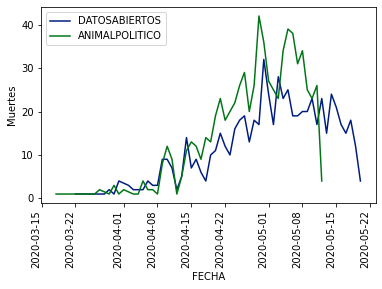

In [368]:
df2.groupby(df2.index).size().plot(label ="DATOSABIERTOS")
df.groupby(df.index).size().plot(label ="ANIMALPOLITICO")
plt.legend()
plt.xticks(rotation=90)
plt.ylabel('Muertes')

Text(0, 0.5, 'Muertes')

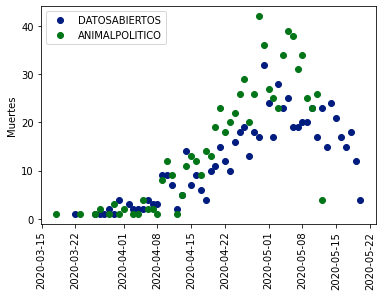

In [369]:
plt.plot(df2.groupby(df2.index).size(),'o', label="DATOSABIERTOS")
plt.plot(df.groupby(df.index).size(),'o', label="ANIMALPOLITICO")
plt.legend()
plt.xticks(rotation=90)
plt.ylabel('Muertes')

Text(0, 0.5, 'Muertes')

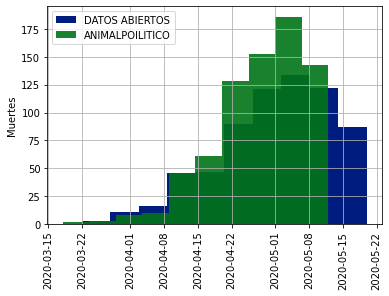

In [375]:
(pd.Series(df2.index)).hist(label="DATOS ABIERTOS")
(pd.Series(df.index)).hist(label="ANIMALPOILITICO",alpha=0.9)
plt.legend()
plt.xticks(rotation=90)
plt.ylabel('Muertes')

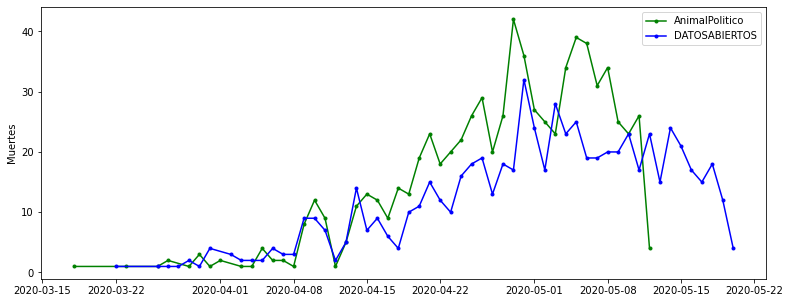

In [402]:
fig, ax = plt.subplots(figsize=(13,5))
ax.plot(df.groupby(df.index).size(),color='g', marker='.', label="AnimalPolitico")
ax.plot(df2.groupby(df2.index).size(),color='blue', marker='.',label="DATOSABIERTOS")
ax.set_ylabel('Muertes')
ax.legend()


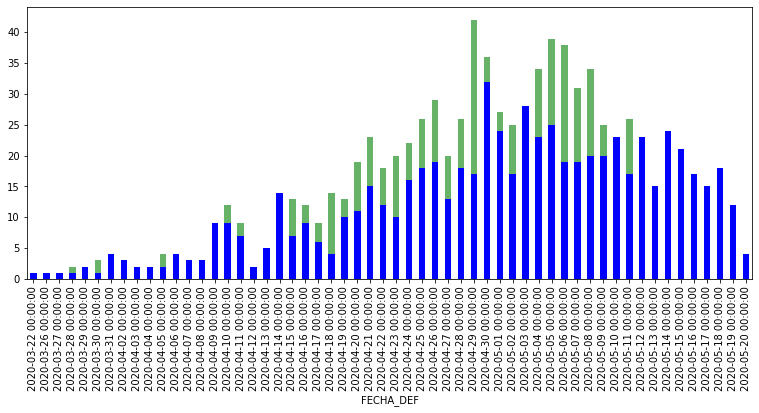

In [410]:
df.groupby(df.index).size().plot(kind="bar",color='g',figsize=(13,5), alpha=0.6)
df2.groupby(df2.index).size().plot(kind="bar",color='blue',figsize=(13,5))

(array([737499., 737506., 737516., 737523., 737530., 737537., 737546.,
        737553., 737560., 737567.]),
 <a list of 10 Text major ticklabel objects>)

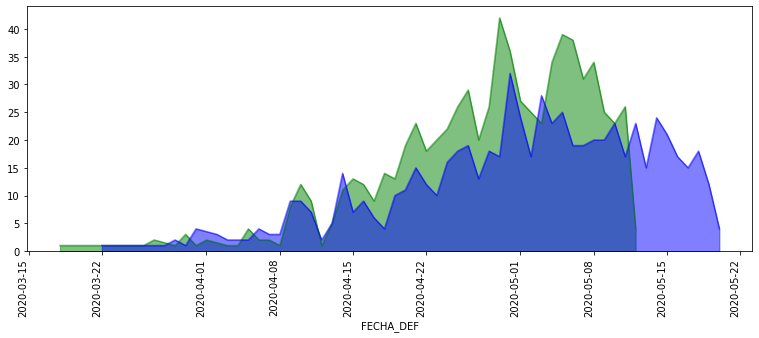

In [412]:
df.groupby(df.index).size().plot.area(stacked=False,figsize=(13,5),color='g')
df2.groupby(df2.index).size().plot.area(stacked=False,figsize=(13,5),color='b')
plt.xticks(rotation=90)

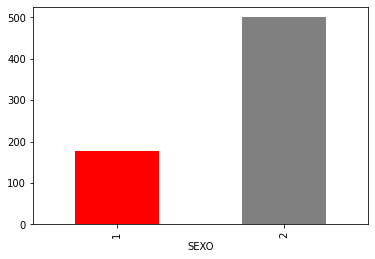

In [414]:
df2.groupby(['SEXO']).size().plot(kind='bar',color=('r','gray')) #1:Mujer, 2: Hombre

Text(0, 0.5, 'MUERTES')

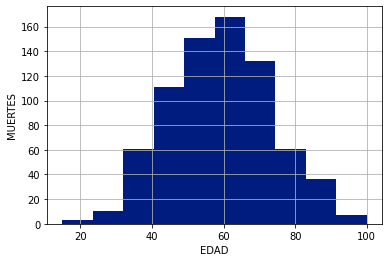

In [396]:
df.EDAD.hist()
plt.xlabel('EDAD')
plt.ylabel('MUERTES')